In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Set visualization style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

## 1. Load dan Eksplorasi Data

In [2]:
# Load data
df = pd.read_csv('data-bank.csv')

# Basic info
print(f"Dataset shape: {df.shape}")
print(f"\nFirst few rows:")
print(df.head())
print(f"\nColumn names (first 20):")
print(df.columns[:20].tolist())

Dataset shape: (6819, 96)

First few rows:
   Bankrupt?   ROA(C) before interest and depreciation before interest  \
0          1                                           0.370594          
1          1                                           0.464291          
2          1                                           0.426071          
3          1                                           0.399844          
4          1                                           0.465022          

    ROA(A) before interest and % after tax  \
0                                 0.424389   
1                                 0.538214   
2                                 0.499019   
3                                 0.451265   
4                                 0.538432   

    ROA(B) before interest and depreciation after tax  \
0                                           0.405750    
1                                           0.516730    
2                                           0.472295    
3      

In [3]:
# Check data types and missing values
print(f"Data types:")
print(df.dtypes)
print(f"\nMissing values:")
print(df.isnull().sum())
print(f"\nTotal missing: {df.isnull().sum().sum()}")

Data types:
Bankrupt?                                                     int64
 ROA(C) before interest and depreciation before interest    float64
 ROA(A) before interest and % after tax                     float64
 ROA(B) before interest and depreciation after tax          float64
 Operating Gross Margin                                     float64
                                                             ...   
 Liability to Equity                                        float64
 Degree of Financial Leverage (DFL)                         float64
 Interest Coverage Ratio (Interest expense to EBIT)         float64
 Net Income Flag                                              int64
 Equity to Liability                                        float64
Length: 96, dtype: object

Missing values:
Bankrupt?                                                   0
 ROA(C) before interest and depreciation before interest    0
 ROA(A) before interest and % after tax                     0
 ROA(B) bef

## 2. Analisis Target Variable (Bankruptcy Status)

Bankruptcy Status Distribution:
Bankrupt?
0    6599
1     220
Name: count, dtype: int64

Percentage:
Bankrupt?
0    96.77372
1     3.22628
Name: proportion, dtype: float64


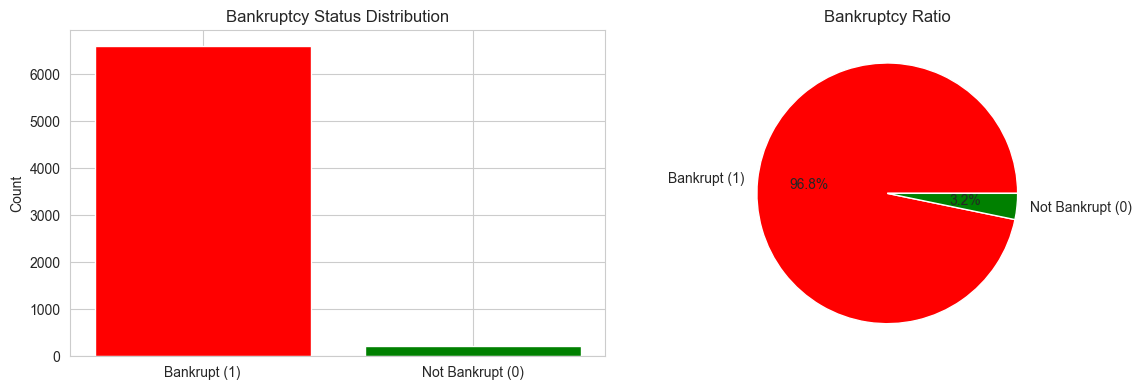

In [4]:
# Check first column (Bankruptcy status)
print(f"Bankruptcy Status Distribution:")
print(df.iloc[:, 0].value_counts())
print(f"\nPercentage:")
print(df.iloc[:, 0].value_counts(normalize=True) * 100)

# Visualize
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Count plot
counts = df.iloc[:, 0].value_counts()
axes[0].bar(['Bankrupt (1)', 'Not Bankrupt (0)'], counts.values, color=['red', 'green'])
axes[0].set_ylabel('Count')
axes[0].set_title('Bankruptcy Status Distribution')

# Pie chart
axes[1].pie(counts.values, labels=['Bankrupt (1)', 'Not Bankrupt (0)'], autopct='%1.1f%%', colors=['red', 'green'])
axes[1].set_title('Bankruptcy Ratio')

plt.tight_layout()
plt.show()

## 3. Analisis Statistik Deskriptif

In [5]:
# Descriptive statistics
print("Descriptive Statistics:")
print(df.describe())
print(f"\nSkewness (first 20 columns):")
print(df.iloc[:, 1:21].skew())
print(f"\nKurtosis (first 20 columns):")
print(df.iloc[:, 1:21].kurtosis())

Descriptive Statistics:
         Bankrupt?   ROA(C) before interest and depreciation before interest  \
count  6819.000000                                        6819.000000          
mean      0.032263                                           0.505180          
std       0.176710                                           0.060686          
min       0.000000                                           0.000000          
25%       0.000000                                           0.476527          
50%       0.000000                                           0.502706          
75%       0.000000                                           0.535563          
max       1.000000                                           1.000000          

        ROA(A) before interest and % after tax  \
count                              6819.000000   
mean                                  0.558625   
std                                   0.065620   
min                                   0.000000   
25%  

## 4. Analisis Korelasi dengan Bankruptcy Status

In [6]:
# Calculate correlation with bankruptcy status (first column)
bankruptcy_col = df.iloc[:, 0]
correlations = df.iloc[:, 1:].corrwith(bankruptcy_col).sort_values(ascending=False)

print("Top 15 Features Positively Correlated with Bankruptcy:")
print(correlations.head(15))
print("\nTop 15 Features Negatively Correlated with Bankruptcy:")
print(correlations.tail(15))

Top 15 Features Positively Correlated with Bankruptcy:
Debt ratio %                                   0.250161
Current Liability to Assets                    0.194494
Borrowing dependency                           0.176543
Current Liability to Current Assets            0.171306
Liability to Equity                            0.166812
Current Liabilities/Equity                     0.153828
Current Liability to Equity                    0.153828
Liability-Assets Flag                          0.139212
Total expense/Assets                           0.139049
Equity to Long-term Liability                  0.139014
Cash/Current Liability                         0.077921
Inventory and accounts receivable/Net value    0.075278
Fixed Assets Turnover Frequency                0.072818
Contingent liabilities/Net worth               0.070455
Fixed Assets to Assets                         0.066328
dtype: float64

Top 15 Features Negatively Correlated with Bankruptcy:
Net Value Per Share (C)           

d:\personal-vault\Kuliah\lab-ai-2331027-benebel\venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3045: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
d:\personal-vault\Kuliah\lab-ai-2331027-benebel\venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3046: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


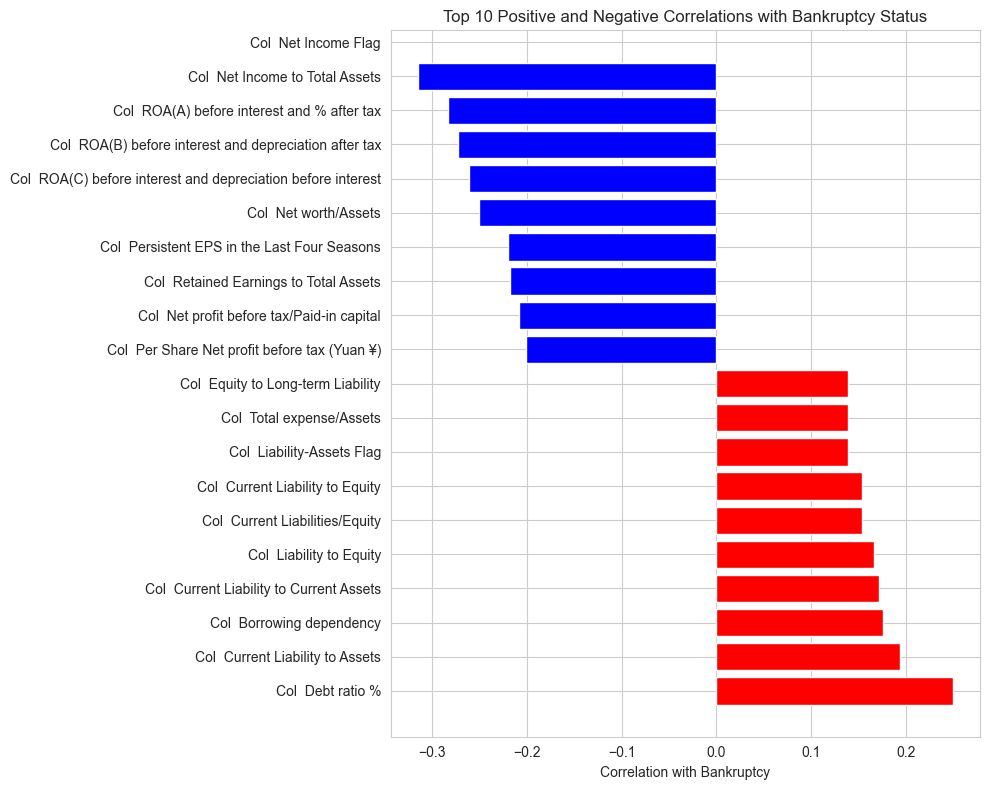

In [7]:
# Visualize top correlations
fig, ax = plt.subplots(figsize=(10, 8))
top_corr = pd.concat([correlations.head(10), correlations.tail(10)])
colors = ['red' if x > 0 else 'blue' for x in top_corr.values]
ax.barh(range(len(top_corr)), top_corr.values, color=colors)
ax.set_yticks(range(len(top_corr)))
ax.set_yticklabels([f"Col {i}" for i in top_corr.index])
ax.set_xlabel('Correlation with Bankruptcy')
ax.set_title('Top 10 Positive and Negative Correlations with Bankruptcy Status')
plt.tight_layout()
plt.show()

## 5. Analisis Perbedaan Bankrupt vs Non-Bankrupt

In [8]:
# Separate by bankruptcy status
bankrupt = df[df.iloc[:, 0] == 1]
not_bankrupt = df[df.iloc[:, 0] == 0]

print(f"Bankrupt companies: {len(bankrupt)}")
print(f"Not bankrupt companies: {len(not_bankrupt)}")

# Compare means of first 10 features
comparison = pd.DataFrame({
    'Bankrupt_Mean': bankrupt.iloc[:, 1:11].mean(),
    'NotBankrupt_Mean': not_bankrupt.iloc[:, 1:11].mean(),
    'Difference': bankrupt.iloc[:, 1:11].mean() - not_bankrupt.iloc[:, 1:11].mean()
})

print("\nMean Comparison (First 10 Features):")
print(comparison)

Bankrupt companies: 220
Not bankrupt companies: 6599

Mean Comparison (First 10 Features):
                                                    Bankrupt_Mean  \
ROA(C) before interest and depreciation before ...       0.418503   
ROA(A) before interest and % after tax                   0.456947   
ROA(B) before interest and depreciation after tax        0.461483   
Operating Gross Margin                                   0.598670   
Realized Sales Gross Margin                              0.598717   
Operating Profit Rate                                    0.998739   
Pre-tax net Interest Rate                                0.796590   
After-tax net Interest Rate                              0.808424   
Non-industry income and expenditure/revenue              0.302609   
Continuous interest rate (after tax)                     0.780799   

                                                    NotBankrupt_Mean  \
ROA(C) before interest and depreciation before ...          0.508069   
ROA(A

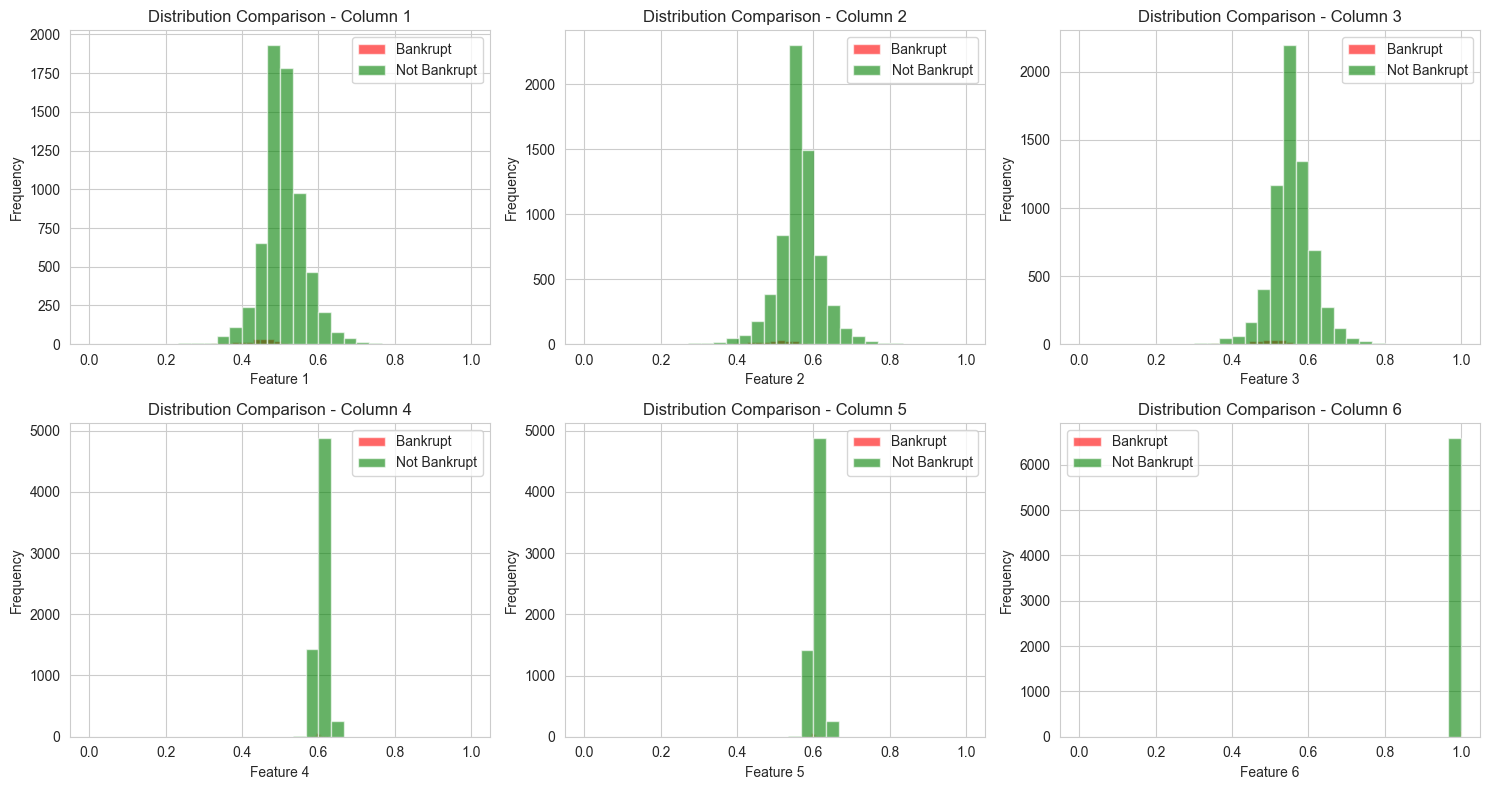

In [9]:
# Visualize distribution differences for key features
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
axes = axes.flatten()

for i, col_idx in enumerate([1, 2, 3, 4, 5, 6]):
    ax = axes[i]
    ax.hist(bankrupt.iloc[:, col_idx], alpha=0.6, label='Bankrupt', bins=30, color='red')
    ax.hist(not_bankrupt.iloc[:, col_idx], alpha=0.6, label='Not Bankrupt', bins=30, color='green')
    ax.set_xlabel(f'Feature {col_idx}')
    ax.set_ylabel('Frequency')
    ax.set_title(f'Distribution Comparison - Column {col_idx}')
    ax.legend()

plt.tight_layout()
plt.show()

## 6. Analisis Distribusi dan Outliers

In [10]:
# Check for outliers using IQR method
def count_outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    return ((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).sum()

outlier_counts = df.iloc[:, 1:].apply(count_outliers)
print("Number of Outliers per Feature (IQR Method):")
print(f"Features with most outliers:")
print(outlier_counts.sort_values(ascending=False).head(10))

Number of Outliers per Feature (IQR Method):
Features with most outliers:
Degree of Financial Leverage (DFL)                    1503
Interest Coverage Ratio (Interest expense to EBIT)    1421
Fixed Assets Turnover Frequency                       1418
Current Asset Turnover Rate                           1399
Total Asset Growth Rate                               1381
Interest Expense Ratio                                1362
Cash Flow to Liability                                1212
No-credit Interval                                    1139
Non-industry income and expenditure/revenue           1094
Cash Flow to Sales                                    1052
dtype: int64


C:\Users\dings\AppData\Local\Temp\ipykernel_1652\2741159755.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(data_to_plot, labels=['Bankrupt', 'Not Bankrupt'], patch_artist=True)
C:\Users\dings\AppData\Local\Temp\ipykernel_1652\2741159755.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(data_to_plot, labels=['Bankrupt', 'Not Bankrupt'], patch_artist=True)
C:\Users\dings\AppData\Local\Temp\ipykernel_1652\2741159755.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(data_to_plot, labels=['Bankrupt', 'Not Bankrupt'], patch_artist=True)
C:\Users\dings\AppData\Local\Te

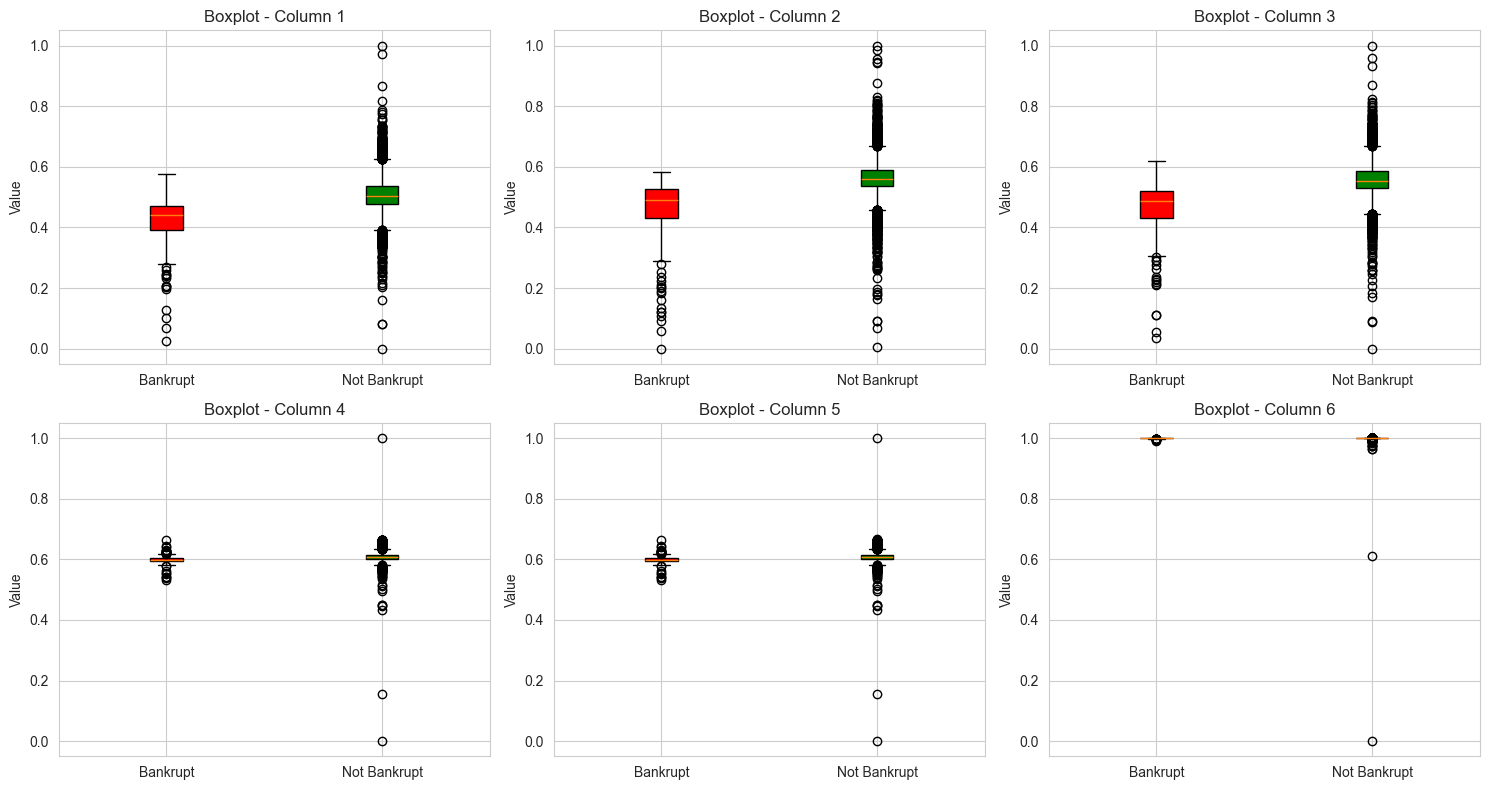

In [11]:
# Visualize boxplots for comparison
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
axes = axes.flatten()

for i, col_idx in enumerate([1, 2, 3, 4, 5, 6]):
    ax = axes[i]
    data_to_plot = [bankrupt.iloc[:, col_idx], not_bankrupt.iloc[:, col_idx]]
    bp = ax.boxplot(data_to_plot, labels=['Bankrupt', 'Not Bankrupt'], patch_artist=True)
    for patch, color in zip(bp['boxes'], ['red', 'green']):
        patch.set_facecolor(color)
    ax.set_ylabel('Value')
    ax.set_title(f'Boxplot - Column {col_idx}')

plt.tight_layout()
plt.show()

## 7. Summary and Key Insights

In [12]:
print("SUMMARY OF ANALYSIS")
print("=" * 60)
print(f"\n1. Dataset Dimensions: {df.shape[0]} rows × {df.shape[1]} columns")
print(f"\n2. Bankruptcy Status:")
print(f"   - Bankrupt: {len(bankrupt)} ({len(bankrupt)/len(df)*100:.1f}%)")
print(f"   - Not Bankrupt: {len(not_bankrupt)} ({len(not_bankrupt)/len(df)*100:.1f}%)")
print(f"\n3. Data Quality:")
print(f"   - Missing values: {df.isnull().sum().sum()}")
print(f"   - Data types: All numeric")
print(f"\n4. Key Findings:")
print(f"   - Highly imbalanced dataset (mostly non-bankrupt companies)")
print(f"   - {(outlier_counts > 0).sum()} features have outliers")
print(f"   - Features show clear separation between bankrupt and non-bankrupt")
print(f"\n5. Top Predictive Features (Correlation):")
for i, (col_idx, corr_val) in enumerate(correlations.head(5).items(), 1):
    print(f"   {i}. Column {col_idx}: {corr_val:.4f}")

SUMMARY OF ANALYSIS

1. Dataset Dimensions: 6819 rows × 96 columns

2. Bankruptcy Status:
   - Bankrupt: 220 (3.2%)
   - Not Bankrupt: 6599 (96.8%)

3. Data Quality:
   - Missing values: 0
   - Data types: All numeric

4. Key Findings:
   - Highly imbalanced dataset (mostly non-bankrupt companies)
   - 89 features have outliers
   - Features show clear separation between bankrupt and non-bankrupt

5. Top Predictive Features (Correlation):
   1. Column  Debt ratio %: 0.2502
   2. Column  Current Liability to Assets: 0.1945
   3. Column  Borrowing dependency: 0.1765
   4. Column  Current Liability to Current Assets: 0.1713
   5. Column  Liability to Equity: 0.1668
